# Comparing European Soccer:
## Germany's Bundesliga vs. England's Premier League
### Our goal is to see if statstical data can show that one league is "better" than the other.

Data was collected from 2 sources:
1. A kaggle SQLite dataset: https://www.kaggle.com/hugomathien/soccer/downloads/soccer.zip
2. Soccer data geared toward betting from this site: http://www.football-data.co.uk/
    - CSV files for England and Germany were taken from this site.

### First, packages were initalized and data placed in pandas dataframes.

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import io
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from bokeh.charts import Scatter, Histogram, BoxPlot, output_file, show, Bar
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import Range1d, Legend

### A SQL Query is used to get data from the SQLite database about player rankings for each league. We imported data with FIFA Overall Player Rating, FIFA Player Potential Rating, and Player Free Kick Accuracy.
The data is spread out over the database so many joins were necessary to link players to leagues, teams, and match data.

In [2]:
database = '/Users/Maureen/Downloads/database.sqlite'
con = sqlite3.connect(database)

#Grab data on EPL and BL1 players from 2011/12 - 2015/16 seasons

data = '''SELECT p.player_name, t.team_long_name, l.name,
            pa.overall_rating, pa.potential, pa.free_kick_accuracy, m.season
            FROM Player_Attributes pa
            JOIN Player p
            ON pa.player_api_id = p.player_api_id
            JOIN Match m
            ON (p.player_api_id = m.away_player_1 OR p.player_api_id = m.away_player_2
            OR p.player_api_id = m.away_player_3 OR p.player_api_id = m.away_player_4 
            OR p.player_api_id = m.away_player_5 OR p.player_api_id = m.away_player_6 
            OR p.player_api_id = m.away_player_7 OR p.player_api_id = m.away_player_8 
            OR p.player_api_id = m.away_player_9 OR p.player_api_id = m.away_player_10 
            OR p.player_api_id =  m.away_player_11)
            JOIN League l
            ON m.league_id = l.id
            JOIN Team t
            ON m.away_team_api_id = t.team_api_id
            WHERE (m.season = '2015/2016' OR m.season = '2014/2015' OR m.season = '2013/2014' 
            OR m.season = '2012/2013' OR m.season = '2011/2012')
            AND (l.name = 'Germany 1. Bundesliga' OR l.name = 'England Premier League')
            '''

df = pd.read_sql_query(data, con=con).drop_duplicates()
df.head()

,player_name,team_long_name,name,overall_rating,potential,free_kick_accuracy,season
0,Richard Stearman,Wolverhampton Wanderers,England Premier League,64.0,73.0,32.0,2011/2012
1,Richard Stearman,Wolverhampton Wanderers,England Premier League,65.0,69.0,32.0,2011/2012
3,Richard Stearman,Wolverhampton Wanderers,England Premier League,65.0,73.0,32.0,2011/2012
4,Richard Stearman,Wolverhampton Wanderers,England Premier League,66.0,73.0,32.0,2011/2012
8,Richard Stearman,Wolverhampton Wanderers,England Premier League,68.0,73.0,32.0,2011/2012


### Next the CSV data from football-data.co.uk was imported. The chosen columns include:
1. Home Team
2. Away Team
3. FTHG: Full Time Home Goals
4. FTAG: Full Time Away Goals
5. FTR: Full Time Result
6. HTHG: Half Time Home Goals
7. HTAG: Half Time Away Goals
8. HTR: Half Time Result

The German and English data is loaded separately. A "League" column is added to each dataframe to differentiate Leagues when the dataframes are combined.

In [25]:
Germanleague = pd.read_csv('https://raw.githubusercontent.com/Shinseeker/IS362_FINAL/master/Bundesliga.csv', 
                           usecols=[2,3,4,5,6,7,8,9])
Germanleague.sort_values(["FTHG","FTAG","FTR","HTHG","HTAG","HTR"], ascending=False)

#add League column for when the 2 files are combined
Germanleague['League'] = 'Bundesliga'
Germanleague.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,League
0,Bayern Munich,Werder Bremen,6,0,H,2,0,H,Bundesliga
1,Augsburg,Wolfsburg,0,2,A,0,1,A,Bundesliga
2,Dortmund,Mainz,2,1,H,1,0,H,Bundesliga
3,Ein Frankfurt,Schalke 04,1,0,H,1,0,H,Bundesliga
4,FC Koln,Darmstadt,2,0,H,1,0,H,Bundesliga


In [28]:
Englishleague = pd.read_csv('https://raw.githubusercontent.com/Shinseeker/IS362_FINAL/master/Premierleague.csv', 
    usecols=[2,3,4,5,6,7,8,9])

Englishleague.sort_values(["FTHG","FTAG","FTR","HTHG","HTAG","HTR"], ascending=False)
Englishleague['League'] = 'Premier_League'
Englishleague.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,League
0,Burnley,Swansea,0,1,A,0,0,D,Premier_League
1,Crystal Palace,West Brom,0,1,A,0,0,D,Premier_League
2,Everton,Tottenham,1,1,D,1,0,H,Premier_League
3,Hull,Leicester,2,1,H,1,0,H,Premier_League
4,Man City,Sunderland,2,1,H,1,0,H,Premier_League


#### The German and England dataframes are combined

In [31]:
g_matches = len(Germanleague)
e_matches = len(Englishleague)

leagues = [Germanleague, Englishleague]
df_goals = pd.concat(leagues)
df_goals['Total_Goals_Scored'] = (df_goals['FTHG'] + df_goals['FTAG'])

df_goals.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,League,Total_Goals_Scored
0,Bayern Munich,Werder Bremen,6,0,H,2,0,H,Bundesliga,6
1,Augsburg,Wolfsburg,0,2,A,0,1,A,Bundesliga,2
2,Dortmund,Mainz,2,1,H,1,0,H,Bundesliga,3
3,Ein Frankfurt,Schalke 04,1,0,H,1,0,H,Bundesliga,1
4,FC Koln,Darmstadt,2,0,H,1,0,H,Bundesliga,2


In [60]:
output_notebook()
p = Bar(df_goals, label='League', values='Total_Goals_Scored', agg='count', color='League',group='Total_Goals_Scored',legend='top_right')

show(p, notebook_handle=True)


Loading BokehJS ...

The leagues play different amounts of games, so comparing by raw score would not be fair. Instead we calculated what percent of time did ...

In [ ]:
g_homegoals = pd.DataFrame(Germanleague.FTHG.value_counts())
g_homegoals['NumberGoals'] = Germanleague.FTHG.value_counts().keys()
g_homegoals['PercentPerGame'] = ((g_homegoals.FTHG / g_matches)*100).round(2)
g_homegoals['League'] = 'Bundesliga'

e_homegoals = pd.DataFrame(Englishleague.FTHG.value_counts())
e_homegoals['NumberGoals'] = Englishleague.FTHG.value_counts().keys()
e_homegoals['PercentPerGame'] = ((e_homegoals.FTHG / e_matches)*100).round(2)
e_homegoals['League'] = 'Premier League'


leaguehomegoals = [e_homegoals, g_homegoals]
homegoals = pd.concat(leaguehomegoals).reset_index(drop=False)
homegoals

#### The player dataframe is cleaned up. Columns are given proper names and data from players are grouped by teams. Individual player data is combined by team by calculating the mean.

In [6]:
#Clean up the column names, and calculate means
cols = ['Player', 'Team', 'League', 'Overall_Rating', 'Potential', 'Free_Kick_Accuracy', 'Season']
df_teams = df.copy()
df_teams.columns = cols
df_teams = df_teams.groupby(['League', 'Season','Team']).mean().reset_index(drop=False)
df_teams.head(50)

,League,Season,Team,Overall_Rating,Potential,Free_Kick_Accuracy
0,England Premier League,2011/2012,Arsenal,77.046296,81.858025,55.629630
1,England Premier League,2011/2012,Aston Villa,73.423529,77.761765,46.791176
2,England Premier League,2011/2012,Blackburn Rovers,70.820069,75.529412,46.487889
3,England Premier League,2011/2012,Bolton Wanderers,70.666667,75.093851,47.825243
4,England Premier League,2011/2012,Chelsea,79.146497,82.117834,57.054140
...,...,...,...,...,...,...
45,England Premier League,2013/2014,Everton,75.978022,80.608059,52.212454
46,England Premier League,2013/2014,Fulham,74.260970,78.203233,55.944573
47,England Premier League,2013/2014,Hull City,70.723684,74.763158,50.006579
48,England Premier League,2013/2014,Liverpool,75.854015,81.456204,54.156934


#### Since the Season column is a string, it is sliced and turned into an integer for easier processing later. We also wanted to see if one league's players weren't living up to their potential more than the other.

In [64]:
#Change Season from string to int
df_teams['Year'] = df_teams.Season.str[:4].apply(int)

#Calculate the percent difference between the player potential and rating. Who's not living up to their potential?
pc = (((df_teams['Overall_Rating'] - df_teams['Potential'])/df_teams['Overall_Rating'])*100).round(2)

df_teams['Rating_vs_Potential'] = pc

### Next, we wanted to see which league has better players as assessed by team's mean Overall Rating and Potential scores.
1. The dataframe was broken into 2 based on which league the data is from.
2. Each league's dataframe was grouped, sorted, and the top 3 teams based on having the highest average Overall Rating for players were chosed for each year.
3. Once the top teams for each year were selected, the dataframes with concated back together.

In [93]:
#Get top 3 teams for each year by League
# Convert seasons from string to int

#Identify the leagues
epl_only = (df_teams.League == 'England Premier League')
bl_only = (df_teams.League == 'Germany 1. Bundesliga')

#split them into 2 df's
epl = df_teams[epl_only]
bl = df_teams[bl_only]

#Sort and groupby, pick top 3
epl_top = epl.groupby(['Year','League','Team','Potential','Free_Kick_Accuracy','Rating_vs_Potential']).mean().Overall_Rating.groupby(level=0, group_keys=False).nlargest(3)
bl_top = bl.groupby(['Year','League','Team','Potential','Free_Kick_Accuracy', 'Rating_vs_Potential']).mean().Overall_Rating.groupby(level=0, group_keys=False).nlargest(3)

#put them back together
top_teams = [epl_top, bl_top]
top3 = pd.concat(top_teams).reset_index(drop=False)

top3.head(30)

,Year,League,Team,Potential,Free_Kick_Accuracy,Rating_vs_Potential,Overall_Rating
0,2011,England Premier League,Manchester City,84.084746,62.132203,-4.19,80.701695
1,2011,England Premier League,Chelsea,82.117834,57.054140,-3.75,79.146497
2,2011,England Premier League,Manchester United,82.628743,53.859281,-4.81,78.835329
3,2012,England Premier League,Manchester City,84.100000,62.027273,-4.66,80.357576
4,2012,England Premier League,Manchester United,82.520710,55.100592,-4.52,78.952663
...,...,...,...,...,...,...,...
25,2014,Germany 1. Bundesliga,Borussia Dortmund,81.035326,53.850543,-6.96,75.763587
26,2014,Germany 1. Bundesliga,VfL Wolfsburg,79.934483,51.975862,-7.10,74.637931
27,2015,Germany 1. Bundesliga,FC Bayern Munich,84.931271,57.041237,-6.98,79.391753
28,2015,Germany 1. Bundesliga,Borussia Dortmund,81.345238,53.062500,-8.38,75.053571


#### Our first graphic shows that on average, England has better players. Data from all teams, not just the top 3 per year were used in this table

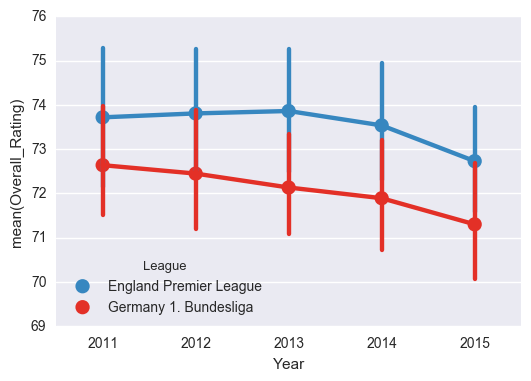

In [91]:
#Compare the averages of each league, all teams included. Not just top 3 per year
sns.set_style("darkgrid")
sns.pointplot(x="Year", y="Overall_Rating", hue='League', palette='Blues_d',data=epl)
sns.pointplot(x="Year", y="Overall_Rating", hue='League', palette='Reds_d',data=bl)

#### Next we wanted to see if the best teams in each league had similarly ranked players. THe result is not surprising - Bayern Munich is the dominant German team while the top English teams have similarly high ranking players.

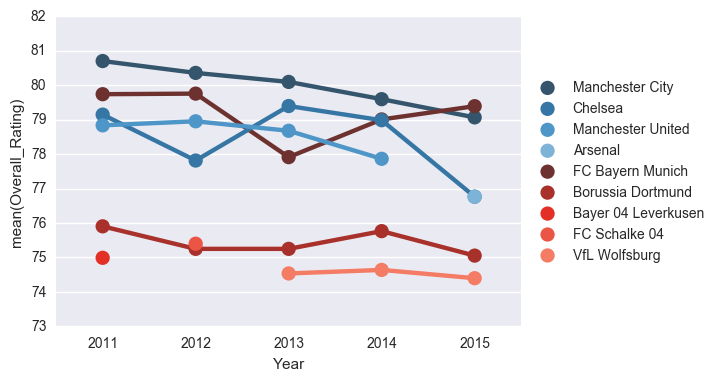

In [70]:
#Need to reset the indices
epl_top = epl_top.reset_index(drop=False)
bl_top = bl_top.reset_index(drop=False)

#averages of top 3 teams of each league.
sns.set_style("darkgrid")
sns.pointplot(x="Year", y="Overall_Rating", hue='Team', palette='Blues_d',data=epl_top)
sns.pointplot(x="Year", y="Overall_Rating", hue='Team', palette='Reds_d',data=bl_top)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))

In [98]:
#I cant figure out how to do a simple line chart in bokeh like the one above. It's a pain in the ass.
output_notebook()

p = Scatter(top3, x='Year', y='Overall_Rating', title="Ratings by Year",
            xlabel="Year", ylabel="Overall Rating", marker='Team', color='League')
show(p, notebook_handle=True)

Loading BokehJS ...

#### Next we wanted to see if one league had a larger gap between player overall ranking and potential. Again, there is a bigger gap with German teams.

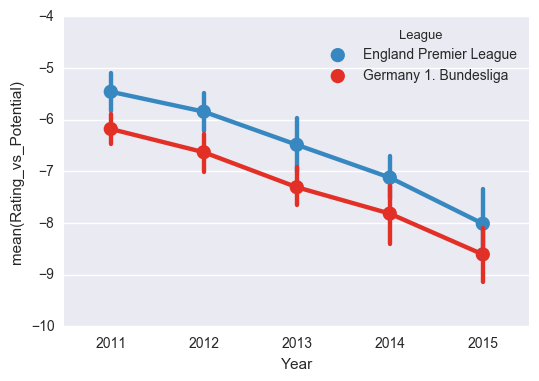

In [79]:
#Players not living up to their potential. The lower the number, the more they're not performing
sns.pointplot(x="Year", y="Rating_vs_Potential",hue='League', palette='Blues_d',agg='max', data=epl)
sns.pointplot(x="Year", y="Rating_vs_Potential",hue='League', palette='Reds_d', agg='max,', data=bl)

### After seeing that the English Premier League has "better" players, we wanted to see if the number of goals scored per game differed between each league.
Since each team plays a different number of games, it wouldn't be fair to compare them purely by the number of goals scored, but rather percentages.

In [110]:
g_matches = len(Germanleague)
e_matches = len(Englishleague)

goals = 

#Series.value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)[source]
g_homegoals = pd.DataFrame(Germanleague.FTHG.value_counts())
g_homegoals['NumberGoals'] = Germanleague.FTHG.value_counts().keys()
g_homegoals['PercentPerGame'] = ((g_homegoals.FTHG / g_matches)*100).round(2)
g_homegoals['League'] = 'Bundesliga'

e_homegoals = pd.DataFrame(Englishleague.FTHG.value_counts())
e_homegoals['NumberGoals'] = Englishleague.FTHG.value_counts().keys()
e_homegoals['PercentPerGame'] = ((e_homegoals.FTHG / e_matches)*100).round(2)
e_homegoals['League'] = 'Premier League'


leaguehomegoals = [e_homegoals, g_homegoals]
homegoals = pd.concat(leaguehomegoals).reset_index(drop=True)
homegoals

,FTHG,NumberGoals,PercentPerGame,League
0,113,1,32.85,Premier League
1,76,2,22.09,Premier League
2,74,0,21.51,Premier League
3,52,3,15.12,Premier League
4,22,4,6.40,Premier League
...,...,...,...,...
10,39,3,13.98,Bundesliga
11,14,4,5.02,Bundesliga
12,4,6,1.43,Bundesliga
13,3,5,1.08,Bundesliga


In [96]:
output_notebook()
p = Bar(homegoals, label='NumberGoals', values='PercentPerGame', agg='max', group='League',
        title="XYZ", legend='top_right')

show(p, notebook_handle=True)

Loading BokehJS ...

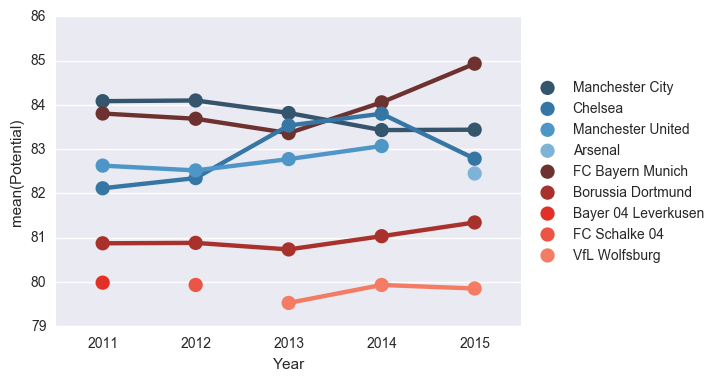

In [108]:
sns.set_style("darkgrid")
sns.pointplot(x="Year", y="Potential", hue='Team', palette='Blues_d',data=epl_top)
sns.pointplot(x="Year", y="Potential", hue='Team', palette='Reds_d',data=bl_top)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))

In [36]:
output_notebook()

p = Scatter(df_teams, x='Year', y='Potential', title="Ratings by Year",
            xlabel="Year", ylabel="Overall Rating", marker='League', color='League')

show(p, notebook_handle=True)

Loading BokehJS ...

In [117]:
#I can't figure out how to make them not overlap.
bottom, top = 65, 90
b = BoxPlot(df_teams, values='Potential', label='Year', color='League',legend=None)
b.set(y_range=Range1d(bottom,top))
show(b)

In [130]:
left, right, bottom, top = 0, 1, 79, 86
b = top3.sort_values('League')
b = BoxPlot(top3, values='Potential', label='Team', color='League', legend=False)
b.set(y_range=Range1d(bottom,top))
#b.add_layout(legend, 'right')
#b.legend.location='top_right'
show(b)